# Mall Customers Segmentation

https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python

We have a dataset with customers data. These customers are from a Mall and we need to segment them to give useful insights to the marketing team, so they can prepare marketing campaings or adapt products to each segment. This is usually easy to do when we have data about our customers, such as age, income or the ammount spent and the type of products they already bought.

Let's start by taking a look at our data and make the necessary cleaning. Even knowing that this data is simple and almost ready to use.

## Import Libraries 

In [5]:
# General Use
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# 3D Visualization 
import plotly as py
import plotly.graph_objs as go

In [6]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


## Exploratory Data Analysis

In [7]:
df = pd.read_csv("Mall_Customers.csv", index_col="CustomerID")
df.head(50)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
6,Female,22,17,76
7,Female,35,18,6
8,Female,23,18,94
9,Male,64,19,3


In [8]:
df.describe(include='all')

,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200,200.000000,200.000000,200.000000
unique,2,NaN,NaN,NaN
top,Female,NaN,NaN,NaN
freq,112,NaN,NaN,NaN
mean,NaN,38.850000,60.560000,50.200000
std,NaN,13.969007,26.264721,25.823522
min,NaN,18.000000,15.000000,1.000000
25%,NaN,28.750000,41.500000,34.750000
50%,NaN,36.000000,61.500000,50.000000
75%,NaN,49.000000,78.000000,73.000000


In [9]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [11]:
df.drop(columns=['Gender'], inplace=True)

C:\Users\warun\AppData\Local\Temp\ipykernel_7496\2732350774.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Age"])


<Axes: xlabel='Age', ylabel='Density'>

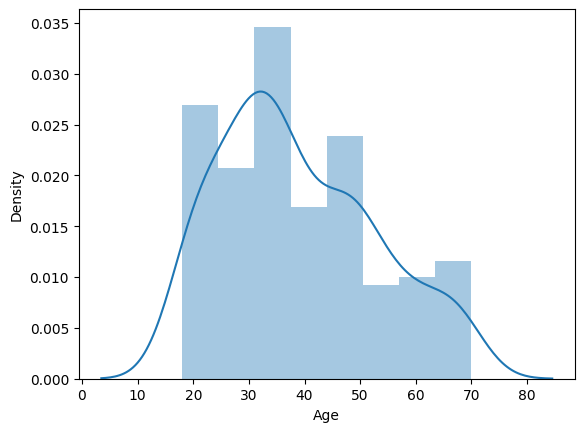

In [12]:
sns.distplot(df["Age"])

C:\Users\warun\AppData\Local\Temp\ipykernel_7496\2895917201.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Annual Income (k$)"])


<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

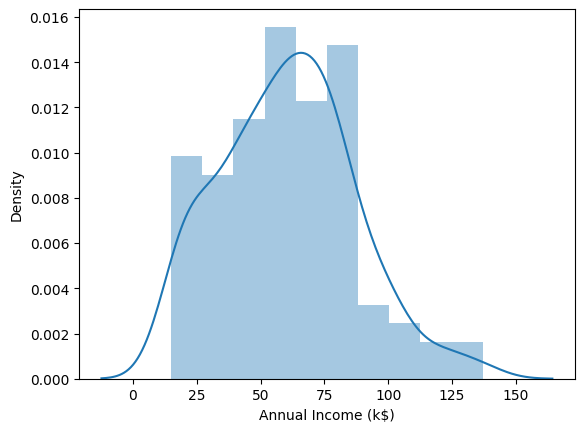

In [13]:
sns.distplot(df["Annual Income (k$)"])

C:\Users\warun\AppData\Local\Temp\ipykernel_7496\73916267.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Spending Score (1-100)"])


<Axes: xlabel='Spending Score (1-100)', ylabel='Density'>

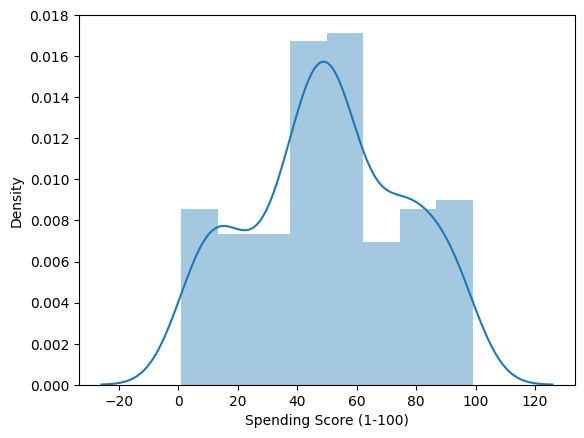

In [14]:
sns.distplot(df["Spending Score (1-100)"])

### K-means Clustering

K-means is one of the most known algorithms to find clusters, works with large datasets while being fast and efficient. This technique was developed in 1957!
- Centroid-based clustering algorithm
- Maximize intra-cluster similarity
- Minimize inter-Cluster similarity

To start we need to set the number of clusters for the K-Means algorithm - How many clusters do we want? - Usually represented by K.

1. Then, the algorithm will randomly select K centers, one for each cluster of data (which are called centroids)
2. Assign each instance to the closest centroid.
3. Calculate the centroids of each cluster formed
4. Return to step 2
5. End when the centroids no longer change

Randomly selected centroids impact the results ? Yes, but with scikit-learn 

#### Client Segmentation with Annual Income and Spending Score

In [15]:
df1 = df[["Annual Income (k$)", "Spending Score (1-100)"]]

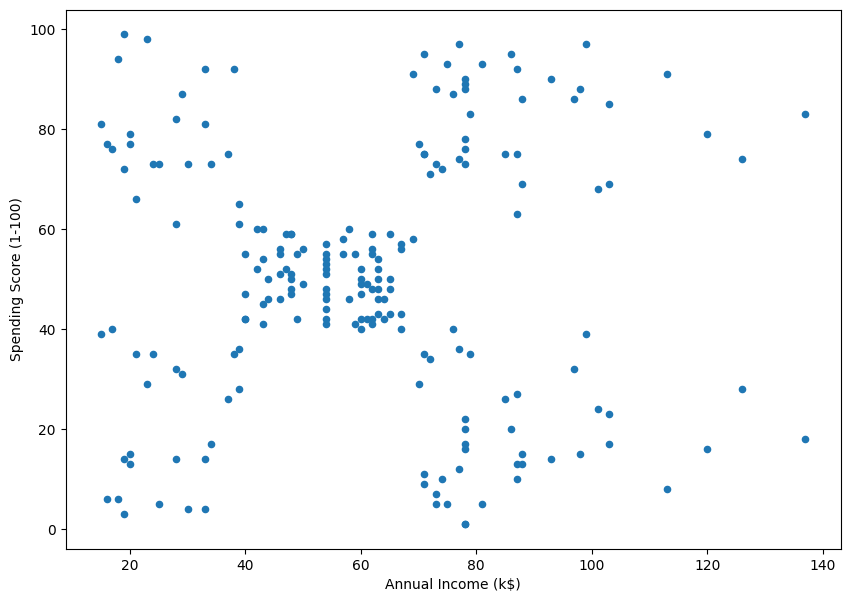

In [16]:
df1.plot(kind="scatter",
        x="Annual Income (k$)",
        y="Spending Score (1-100)",
        figsize=(10, 7))
plt.show()

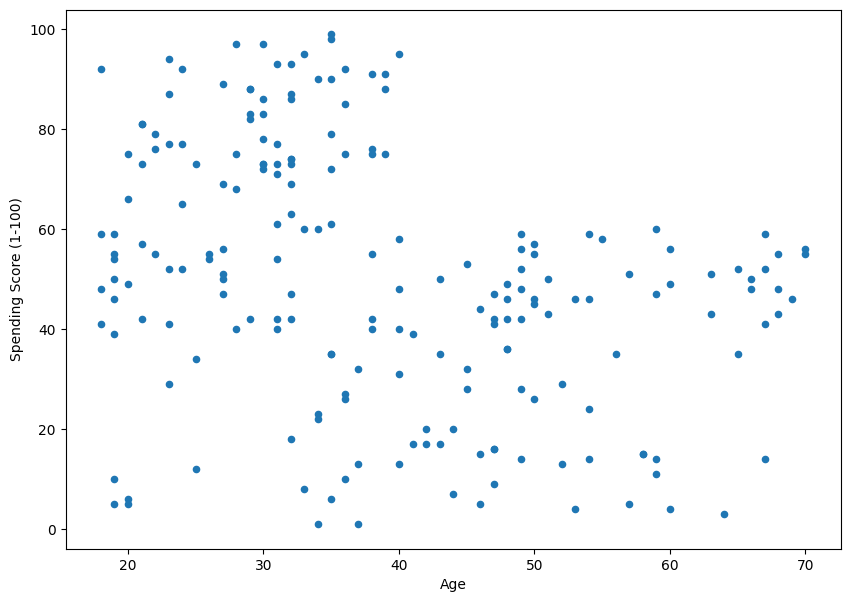

In [17]:
###The grapht of spending score respectively to age 
dfas = df[["Age", "Spending Score (1-100)"]]

dfas.plot(kind="scatter",
        x="Age",
        y="Spending Score (1-100)",
        figsize=(10, 7))
plt.show()

In [18]:
#### Finding the Optimal Number of Clusters with the Elbow Method

In [19]:
sum_of_sqr_dist = {}

for k in range(1, 10):
    km = KMeans(n_clusters=k, init='k-means++', max_iter=1000)
    km = km.fit(df1)
    sum_of_sqr_dist[k] = km.inertia_

c:\Users\warun\anaconda3\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\warun\anaconda3\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\warun\anaconda3\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\warun\anaconda3\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks t

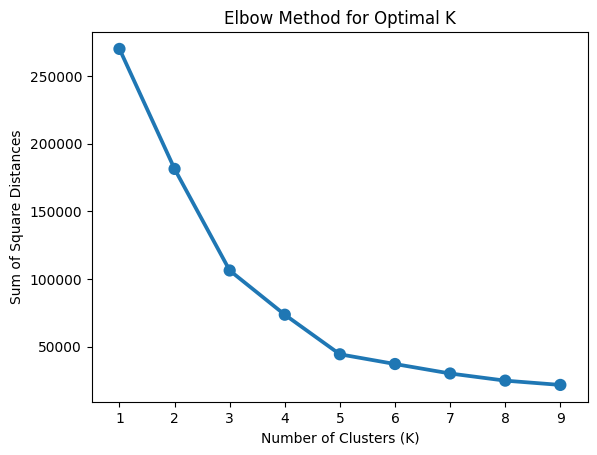

In [20]:
sns.pointplot(x=list(sum_of_sqr_dist.keys()), y=list(sum_of_sqr_dist.values()))
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Sum of Square Distances")
plt.title("Elbow Method for Optimal K")
plt.show()

c:\Users\warun\anaconda3\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\warun\anaconda3\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\warun\anaconda3\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\warun\anaconda3\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks t

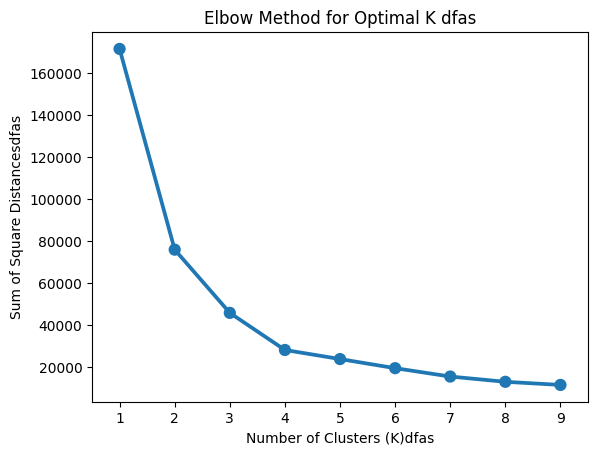

In [21]:
# Second dfas
sum_of_sqr_distdfas = {}

for k in range(1, 10):
    km = KMeans(n_clusters=k, init='k-means++', max_iter=1000)
    km = km.fit(dfas)
    sum_of_sqr_distdfas[k] = km.inertia_
    
sns.pointplot(x=list(sum_of_sqr_distdfas.keys()), y=list(sum_of_sqr_distdfas.values()))
plt.xlabel("Number of Clusters (K)dfas")
plt.ylabel("Sum of Square Distancesdfas")
plt.title("Elbow Method for Optimal K dfas")
plt.show()

### K-Means Clustering

In [22]:
Model = KMeans(n_clusters=5,
             init='k-means++',
             max_iter=1000)
Model.fit(df1)

c:\Users\warun\anaconda3\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\warun\anaconda3\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(max_iter=1000, n_clusters=5)

In [23]:
#second dfas clustering model 
Modeldfas = KMeans(n_clusters=4,
             init='k-means++',
             max_iter=1000)
Modeldfas.fit(dfas)

c:\Users\warun\anaconda3\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\warun\anaconda3\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(max_iter=1000, n_clusters=4)

In [24]:
print("Labels", Model.labels_)

Labels [0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 4 0 2 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 1 3 1 4 1 3 1 3 1 4 1 3 1 3 1 3 1 3 1 4 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


In [25]:
#dfas model labelling 
print("Labels", Modeldfas.labels_)

Labels [0 1 2 1 0 1 2 1 2 1 2 1 2 1 2 1 0 0 2 1 0 1 2 1 2 1 2 0 2 1 2 1 2 1 2 1 2
 1 2 1 3 1 3 0 2 0 3 0 0 0 3 0 0 3 3 3 3 3 0 3 3 0 3 3 3 0 3 3 0 0 3 3 3 3
 3 0 3 0 0 3 3 0 3 3 0 3 3 0 0 3 3 0 3 0 0 0 3 0 3 0 0 3 3 0 3 0 3 3 3 3 3
 0 0 0 0 0 3 3 3 3 0 0 0 1 0 1 3 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 3 1
 2 1 2 1 2 1 2 1 2 1 2 1 3 1 2 1 2 1 2 1 2 0 2 1 2 1 2 1 2 1 2 1 2 1 2 1 0
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


In [26]:
print("Centroids", Model.cluster_centers_)

Centroids [[26.30434783 20.91304348]
 [86.53846154 82.12820513]
 [25.72727273 79.36363636]
 [88.2        17.11428571]
 [55.2962963  49.51851852]]


In [27]:
#dfas model centroid 
print("Centroidsdfas", Modeldfas.cluster_centers_)

Centroidsdfas [[27.61702128 49.14893617]
 [30.1754386  82.35087719]
 [43.29166667 15.02083333]
 [55.70833333 48.22916667]]


In [28]:
centroids = Model.cluster_centers_

In [29]:
#Centroidsdfas 
Centroidsdfas=Modeldfas.cluster_centers_

In [30]:
df1_cluster = df1.copy()
df1_cluster["Cluster"] = Model.fit_predict(df1)

c:\Users\warun\anaconda3\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\warun\anaconda3\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [31]:
dfas_cluster=dfas.copy()
dfas_cluster["Clusterdfas"]= Modeldfas.fit_predict(dfas)

c:\Users\warun\anaconda3\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\warun\anaconda3\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [32]:
df1_cluster.head()

,Annual Income (k$),Spending Score (1-100),Cluster
CustomerID,,,
1,15,39,3
2,15,81,2
3,16,6,3
4,16,77,2
5,17,40,3


In [33]:
#In this incident, 5 clusters are available for df1. So how take the exact count
cluster_countsdf1 = df1_cluster['Cluster'].value_counts()
cluster_countsdf1

Cluster
0    81
4    39
1    35
3    23
2    22
Name: count, dtype: int64

In [34]:
dfas_cluster.head()

,Age,Spending Score (1-100),Clusterdfas
CustomerID,,,
1,19,39,1
2,21,81,0
3,20,6,2
4,23,77,0
5,31,40,1


In [35]:
#count of the 4 clusters in each cluster (1 to 4)
cluster_countsdfas = dfas_cluster['Clusterdfas'].value_counts()
cluster_countsdfas

Clusterdfas
0    57
2    48
3    48
1    47
Name: count, dtype: int64

#### Visualizing Clusters

In [36]:
#df1_cluster visualization / df1_cluster (5 clusters and 5 colors only)
Color = ['red', 'blue', 'black', 'gold', 'navy']
df1_cluster['Color'] = df1_cluster['Cluster'].map(lambda p:Color[p])

In [37]:
df1_cluster.head()

,Annual Income (k$),Spending Score (1-100),Cluster,Color
CustomerID,,,,
1,15,39,3,gold
2,15,81,2,black
3,16,6,3,gold
4,16,77,2,black
5,17,40,3,gold


In [38]:
#dfas_cluster visualization / Clusterdfas (4 clusters and 4 colors only)
Coloraf = ['green', 'orange', 'black', 'brown']
dfas_cluster['Coloraf'] = dfas_cluster['Clusterdfas'].map(lambda p:Coloraf[p])

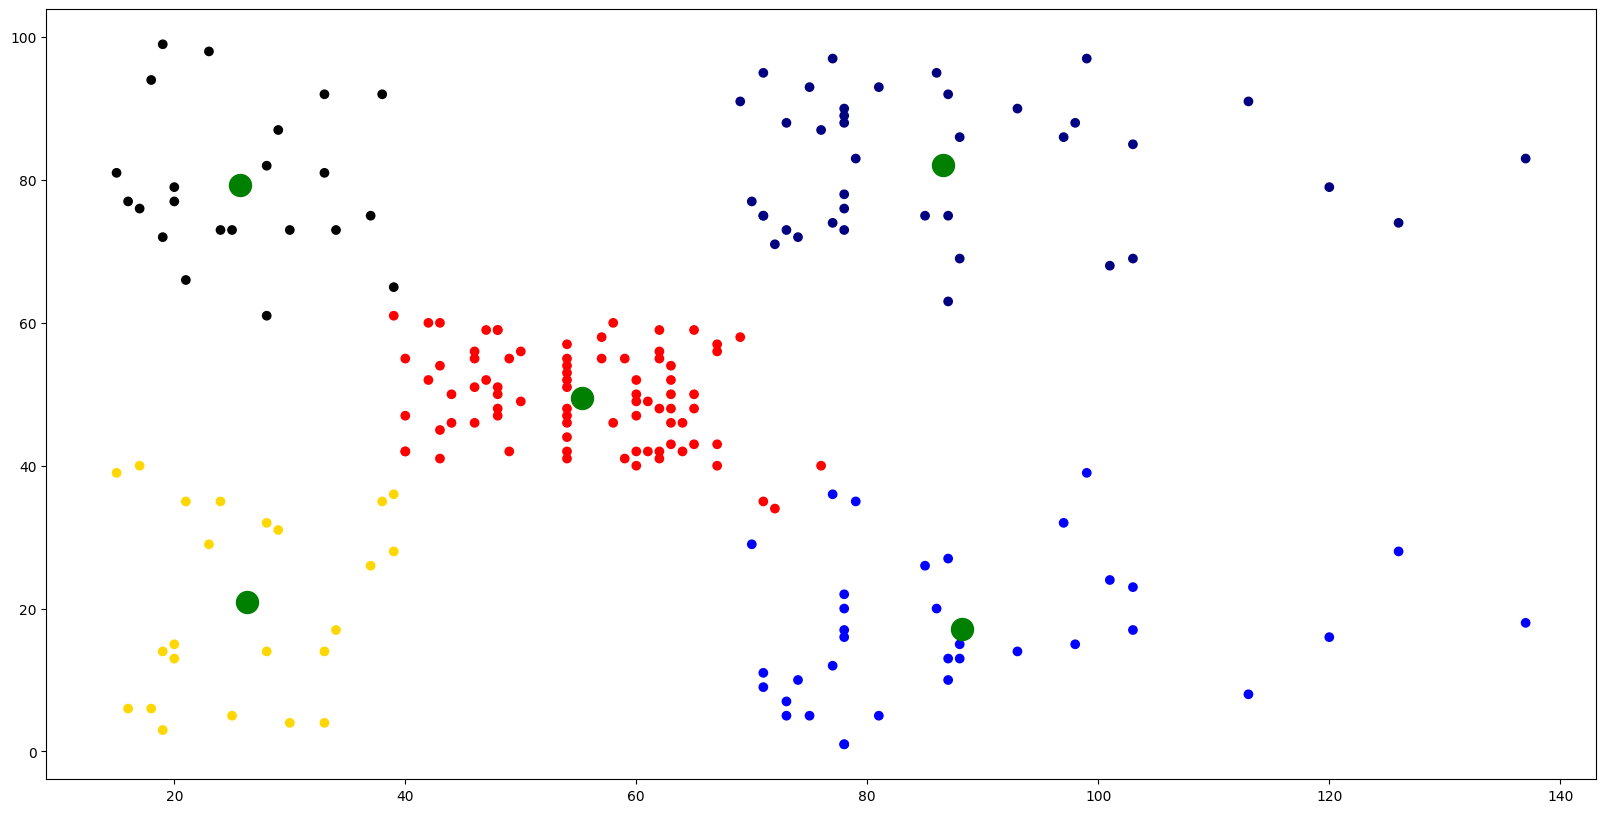

In [39]:
plt.figure(figsize=(20, 10))
plt.scatter(df1["Annual Income (k$)"],
           df1["Spending Score (1-100)"],
           c=df1_cluster["Color"])

plt.scatter(centroids[:, 0], centroids[:, 1], c='green', s=250)
plt.show()

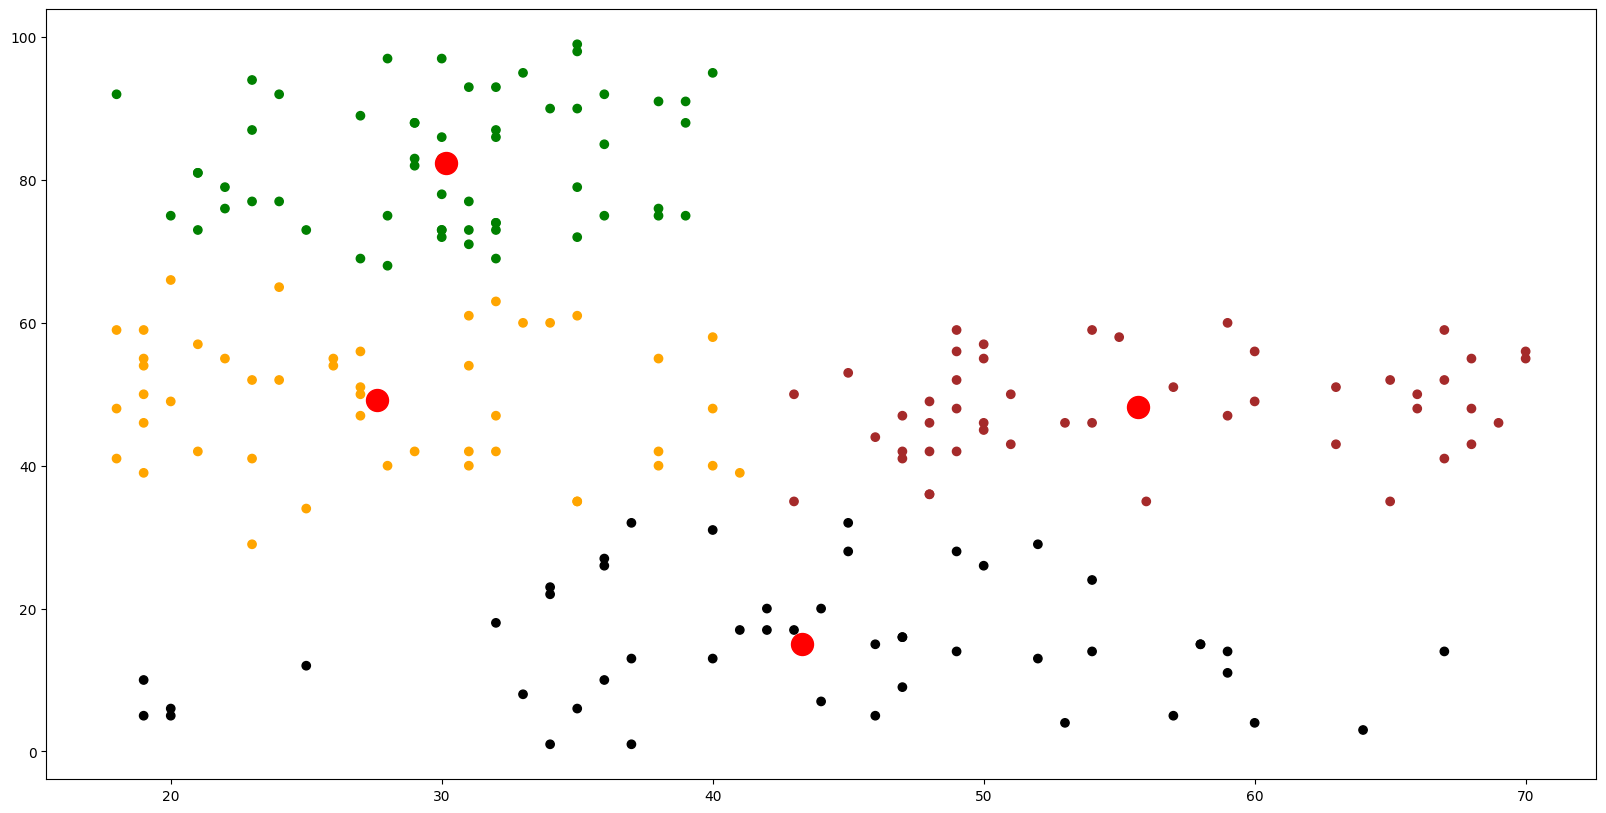

In [40]:
#Visualization #dfas_cluster visualization / Clusterdfas (4 clusters and 4 colors only)
plt.figure(figsize=(20, 10))
plt.scatter(dfas["Age"],
           dfas["Spending Score (1-100)"],
           c=dfas_cluster["Coloraf"])

plt.scatter(Centroidsdfas[:, 0], Centroidsdfas[:, 1], c='red', s=250)
plt.show()

#### Evaluation with Silhouette Score

In [41]:
#for df1
labels = Model.labels_

In [42]:
#for dfas
labelsdfas = Modeldfas.labels_

In [43]:
#for df1
silhouette_score(df1, labels)

0.553931997444648

In [44]:
#for dfas
silhouette_score(dfas, labelsdfas)

0.49973941540141753

In [45]:
silhouette = {}

for k in range(2,8):
    km = KMeans(n_clusters=k, init='k-means++', max_iter=1000)
    km.fit(df1)
    silhouette[k] = silhouette_score(df1, km.labels_)

c:\Users\warun\anaconda3\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\warun\anaconda3\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\warun\anaconda3\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\warun\anaconda3\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks t

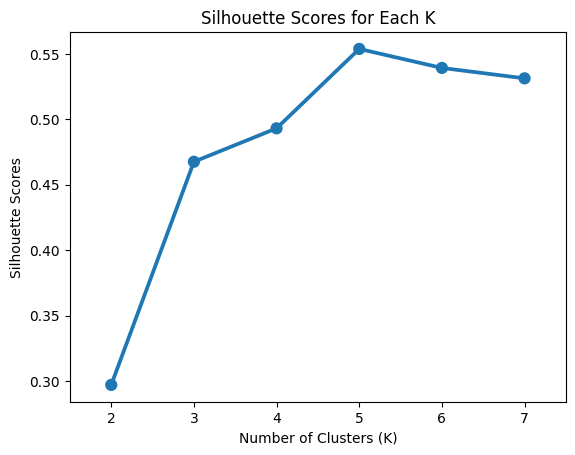

In [46]:
sns.pointplot(x=list(silhouette.keys()), y=list(silhouette.values()))
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Scores")
plt.title("Silhouette Scores for Each K")
plt.show()

In [47]:
#for dfas
silhouettedfas = {}

for k in range(2,8):
    km = KMeans(n_clusters=k, init='k-means++', max_iter=1000)
    km.fit(dfas)
    silhouettedfas[k] = silhouette_score(dfas, km.labels_)
    


c:\Users\warun\anaconda3\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\warun\anaconda3\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\warun\anaconda3\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\warun\anaconda3\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks t

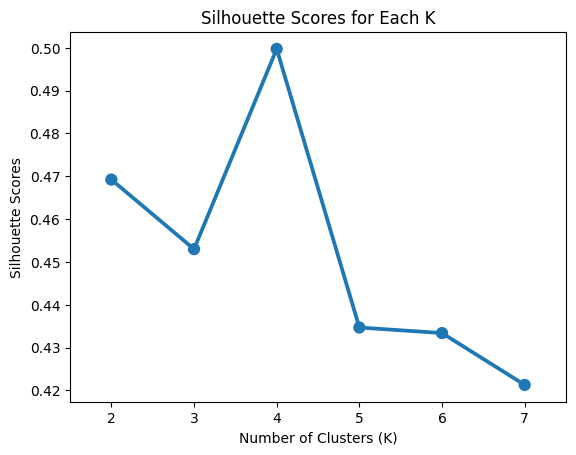

In [48]:
#for dfas with silhouettedfas
    
sns.pointplot(x=list(silhouettedfas.keys()), y=list(silhouettedfas.values()))
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Scores")
plt.title("Silhouette Scores for Each K")
plt.show()

### Client Segmentation with All 3 Features

In [49]:
df2= df.copy()

In [50]:
df.head()

,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,
1,19,15,39
2,21,15,81
3,20,16,6
4,23,16,77
5,31,17,40


In [51]:
df2.head()

,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,
1,19,15,39
2,21,15,81
3,20,16,6
4,23,16,77
5,31,17,40


In [52]:
sum_of_sqr_dist = {}

for k in range(1, 10):
    km = KMeans(n_clusters=k, init='k-means++', max_iter=1000)
    km = km.fit(df2)
    sum_of_sqr_dist[k] = km.inertia_
    


c:\Users\warun\anaconda3\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\warun\anaconda3\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\warun\anaconda3\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\warun\anaconda3\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks t

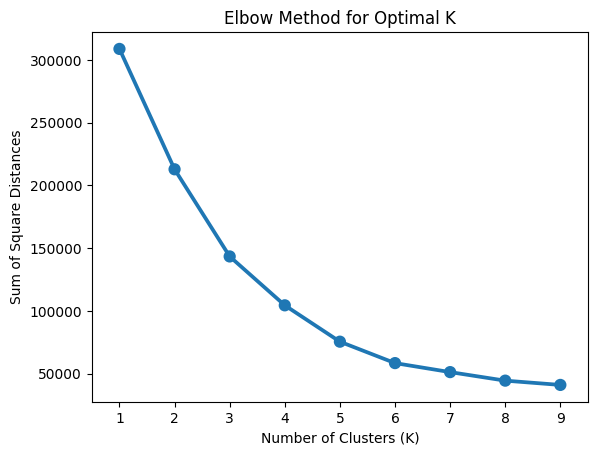

In [53]:
sns.pointplot(x=list(sum_of_sqr_dist.keys()), y=list(sum_of_sqr_dist.values()))
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Sum of Square Distances")
plt.title("Elbow Method for Optimal K")
plt.show()

In [54]:
Model2 = KMeans(n_clusters=6, init='k-means++', max_iter=1000)
Model2.fit(df2)

# Modeldf2 = KMeans(n_clusters=6,
#              init='k-means++',
#              max_iter=1000)
# Modeldf2.fit(df2)

c:\Users\warun\anaconda3\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\warun\anaconda3\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(max_iter=1000, n_clusters=6)

In [55]:
# check silhoutte_score for df2

#for df2
labelsdf2 = Model2.labels_

print(silhouette_score(df2, labelsdf2))

0.4523443947724053


In [56]:
# Assuming Model2 is the trained K-means model

# Assuming new_inputs is a DataFrame containing new independent variables
new_inputs = pd.DataFrame([[30, 70, 80], [40, 50, 60], [50, 80, 40]], columns=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])

# Obtain the cluster labels for the new inputs
predicted_labels = Model2.predict(new_inputs)

# Display the new inputs with the corresponding cluster labels
new_inputs['Cluster'] = predicted_labels
print(new_inputs)


   Age  Annual Income (k$)  Spending Score (1-100)  Cluster
0   30                  70                      80        3
1   40                  50                      60        5
2   50                  80                      40        1


In [57]:
# Assuming Model2 is the trained K-means model

# Assuming new_inputs is a DataFrame containing new independent variables
new_inputs = pd.DataFrame([[30, 70, 80], [40, 50, 60], [50, 80, 40]], columns=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])

# Obtain the cluster labels for the new inputs
predicted_labels = Model2.predict(new_inputs)

# Create a new DataFrame with the predicted cluster labels
predictions = pd.DataFrame(predicted_labels, columns=['Cluster'])

# Concatenate the new inputs DataFrame with the predicted cluster labels DataFrame
new_data_with_predictions = pd.concat([new_inputs, predictions], axis=1)

# Display the new inputs with the corresponding cluster labels
print(new_data_with_predictions)


   Age  Annual Income (k$)  Spending Score (1-100)  Cluster
0   30                  70                      80        3
1   40                  50                      60        5
2   50                  80                      40        1


In [58]:
# Silhouette Scores for Each K then indicating Silhouette graph. it could help to confirm the count of clusters. Now we knew k=6 but we should confirm about it 

silhouettedf2 = {}

for k in range(2,10):
    km = KMeans(n_clusters=k, init='k-means++', max_iter=1000)
    km.fit(df2)
    silhouettedf2[k] = silhouette_score(df2, km.labels_)

c:\Users\warun\anaconda3\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\warun\anaconda3\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\warun\anaconda3\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\warun\anaconda3\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks t

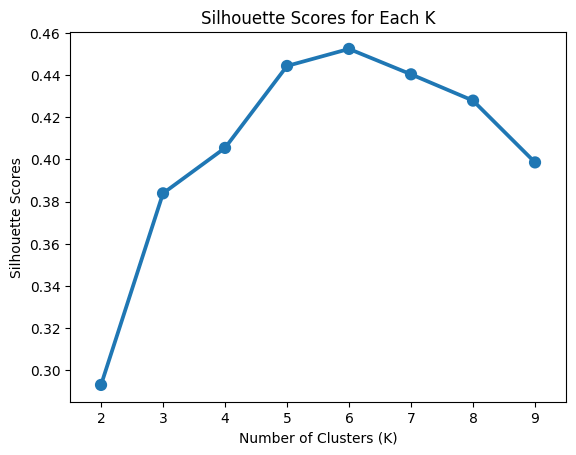

In [59]:
#*** Silhouette Score confirmed the optimal clusters count is (k=6)

#Representation of the silhouette graph for df2
sns.pointplot(x=list(silhouettedf2.keys()), y=list(silhouettedf2.values()))
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Scores")
plt.title("Silhouette Scores for Each K")
plt.show()


In [60]:
df2['Cluster'] = Model2.fit_predict(df2)
df2.head()

c:\Users\warun\anaconda3\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\warun\anaconda3\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,Age,Annual Income (k$),Spending Score (1-100),Cluster
CustomerID,,,,
1,19,15,39,4
2,21,15,81,3
3,20,16,6,4
4,23,16,77,3
5,31,17,40,4


In [61]:
# Majority Voting:

# Save the dataframe as an Excel file
df2.to_excel('df2_clustered.xlsx', index=False)

# Majority Voting: If you don't have ground truth labels but have some knowledge about the data, you can perform majority voting. 
# This involves examining the characteristics of the data points within each cluster and assigning a label based on the majority class or category present in the cluster.

In [62]:
#According to age, annual income and spending score which are independent vriables.
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Age                     200 non-null    int64
 1   Annual Income (k$)      200 non-null    int64
 2   Spending Score (1-100)  200 non-null    int64
 3   Cluster                 200 non-null    int32
dtypes: int32(1), int64(3)
memory usage: 7.0 KB


In [63]:
#respectively to other 3 independent variables [Age,Annual Income (k$),Spending Score (1-100)]
cluster_counts = df2['Cluster'].value_counts()
cluster_counts


Cluster
1    45
2    39
5    38
0    35
3    22
4    21
Name: count, dtype: int64

In [64]:
cluster_zero = df2[df2['Cluster'] == 0]
cluster_zero.head(10)



,Age,Annual Income (k$),Spending Score (1-100),Cluster
CustomerID,,,,
127,43,71,35,0
129,59,71,11,0
131,47,71,9,0
135,20,73,5,0
137,44,73,7,0
139,19,74,10,0
141,57,75,5,0
145,25,77,12,0
147,48,77,36,0


In [65]:
cluster_counts = df2['Cluster'].value_counts()
print(cluster_counts[0])

35


In [66]:
# Assuming Model2 is the trained K-means model

# Assuming df2 is the original DataFrame used for training the model
# Obtain the cluster labels for the existing data points
cluster_labels = Model2.labels_

# Create a new DataFrame with the original data and their corresponding cluster labels
df2_with_clusters = df2.copy()
df2_with_clusters['Cluster'] = cluster_labels

# Perform cluster analysis by examining the statistics of each cluster
cluster_stats = df2_with_clusters.groupby('Cluster').describe()
print(cluster_stats)


          Age                                                         
        count       mean        std   min    25%   50%    75%   max   
Cluster                                                               
0        35.0  41.685714  10.897305  19.0  35.00  43.0  47.50  59.0  \
1        45.0  56.155556   8.543886  43.0  49.00  54.0  65.00  70.0   
2        39.0  32.692308   3.728650  27.0  30.00  32.0  35.50  40.0   
3        22.0  25.272727   5.257030  18.0  21.25  23.5  29.75  35.0   
4        21.0  44.142857  13.089254  19.0  35.00  45.0  53.00  67.0   
5        38.0  27.000000   7.032742  18.0  21.00  26.5  31.75  40.0   

        Annual Income (k$)             ...                 
                     count       mean  ...    75%    max   
Cluster                                ...                 
0                     35.0  88.228571  ...  97.50  137.0  \
1                     45.0  53.377778  ...  62.00   67.0   
2                     39.0  86.538462  ...  95.00  137.0   


__3D Visualization__ (it's not possible create 2d graph to indicate attribute of relavant cluster, because there are three independnet variables are available there )

In [67]:
labels = Model2.labels_
centroids = Model2.cluster_centers_

In [68]:
df2['labels'] = labels

trace = go.Scatter3d(
                    x = df2['Age'],
                    y = df2['Annual Income (k$)'],
                    z = df2['Spending Score (1-100)'],
                    mode = 'markers',
                    marker=dict(color=df2['labels'], size = 5, line=dict(color=df2['labels'], width=12), opacity=0.8)
                    )
    
data = [trace]
layout = go.Layout(
                    title='Clusters',
                    scene= dict(
                                xaxis = dict(title = 'Age'),
                                yaxis = dict(title = 'Annual Income (k$)'),
                                zaxis = dict(title = 'Spending Score (1-100)'))
                                )

fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)
plt.show()